In [ ]:
'''Apply simple K-means algorithm for clustering any dataset. Compare the performance
of clusters by varying the algorithm parameters. For a given set of parameters, plot a
line graph depicting MSE obtained after each iteration'''

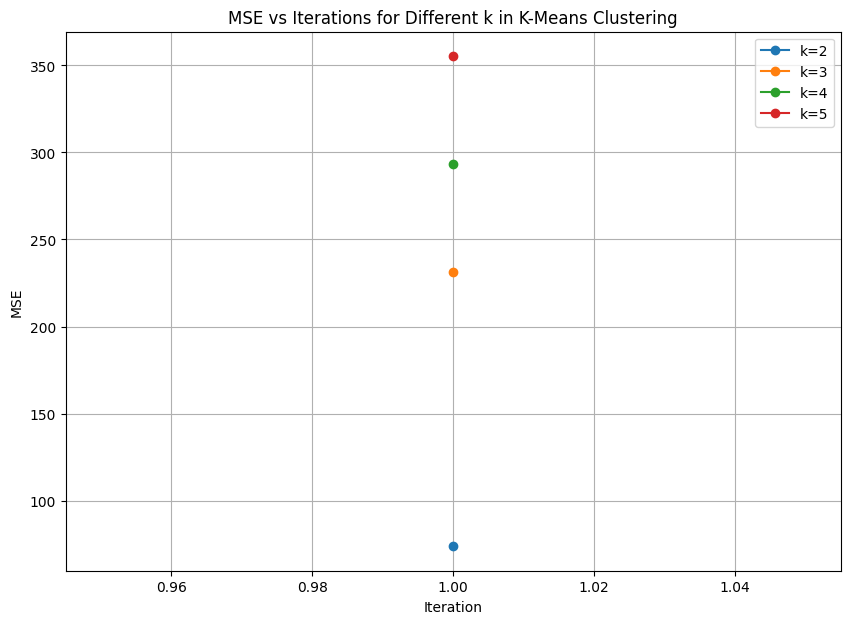

In [6]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to compute inertia (sum of squared distances)
def compute_inertia(kmeans, data):
    return np.sum(np.min(np.square(data[:, np.newaxis] - kmeans.cluster_centers_), axis=2))

# Apply K-means clustering with a specific number of clusters (k)
def kmeans_with_mse_tracking(X, k):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1, max_iter=1, random_state=42, tol=1e-4, verbose=0)
    mse_values = []

    # Initial fit and tracking MSE
    kmeans.fit(X)
    mse_values.append(compute_inertia(kmeans, X))
    
    # Iteratively fit the model and track MSE
    for i in range(1, kmeans.max_iter):
        kmeans = KMeans(n_clusters=k, init=kmeans.cluster_centers_, n_init=1, max_iter=1, random_state=42, tol=1e-4, verbose=0)
        kmeans.fit(X)
        mse = compute_inertia(kmeans, X)
        mse_values.append(mse)
        if len(mse_values) > 1 and np.abs(mse_values[-1] - mse_values[-2]) < kmeans.tol:
            break
    
    return kmeans, mse_values

# Varying number of clusters
ks = [2, 3, 4, 5]
mse_results = {}

for k in ks:
    _, mse_values = kmeans_with_mse_tracking(X_scaled, k)
    mse_results[k] = mse_values

# Plot MSE for different values of k
plt.figure(figsize=(10, 7))
for k in ks:
    plt.plot(range(1, len(mse_results[k]) + 1), mse_results[k], marker='o', label=f'k={k}')

plt.title('MSE vs Iterations for Different k in K-Means Clustering')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()
